In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"

import theano
# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_ujm8ft2b.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Mapped name None to device cuda: GeForce RTX 2080 (0000:01:00.0)


In [2]:
Moureze_points = pn.read_csv('../data/input_data/Moureze/Moureze_Points.csv', sep=';',
                         names=['X', 'Y', 'Z', 'G_x', 'G_y', 'G_z'], header=1)
Sections_EW = pn.read_csv('../data/input_data/Moureze/Sections_EW.csv', sep=';',
                         names=['X', 'Y', 'Z', 'ID'], header=1).dropna()
Sections_NS = pn.read_csv('../data/input_data/Moureze/Sections_NS.csv', sep=';',
                         names=['X', 'Y', 'Z', 'ID'], header=1).dropna()

In [3]:
mask_surfpoints = Moureze_points['G_x'] < -9999
surfpoints = Moureze_points[mask_surfpoints]
orientations = Moureze_points[~mask_surfpoints]

In [4]:
surfpoints['surface'] = 0.0
orientations['surface'] = 0.0

In [5]:
orientations.loc[0:2]

,X,Y,Z,G_x,G_y,G_z,surface
0,256.198395,344.000000,-100.000,0.671273,0.641262,0.371719,0.0
2,199.974075,351.877136,-157.355,0.447513,0.563921,0.694065,0.0


Suggested size of the axis-aligned modeling box:

Origin: -5 -5 -200

Maximum: 305 405 -50

Suggested resolution: 2m (grid size 156 x 206 x 76)

### Only using one orientation because otherwhise it gets a mess

In [35]:
resolution_requ = [156, 206, 76]
resolution = [77, 103, 38]
geo_model = gp.create_model('Moureze')
geo_model = gp.init_data(geo_model, [-5,305,-5,405,-200, -50],resolution,
                        surface_points_df=surfpoints, orientations_df=orientations.loc[0:1], surface_name='surface',
                         add_basement=True)

Active grids: ['regular']


/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
geo_model.orientations.df.head()

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,256.198395,344.000000,-100.000,0.634653,0.682322,0.534193,0.671273,0.641262,0.371719,68.178328,46.309835,1,0,Default series,1,1,0.01
2,199.974075,351.877136,-157.355,0.564083,0.692209,0.462203,0.447513,0.563921,0.694065,46.047243,38.434599,1,0,Default series,1,1,0.01
3,61.933350,21.684322,-124.568,0.390820,0.277765,0.503356,-0.654601,0.659643,-0.369282,111.671343,315.219810,1,0,Default series,1,1,0.01
4,274.000000,130.465240,-128.000,0.656997,0.414302,0.499048,0.292010,0.952812,-0.082946,94.757922,17.038825,1,0,Default series,1,1,0.01
5,91.941277,221.176559,-122.021,0.428484,0.528159,0.506553,-0.089229,-0.573854,0.814082,35.503307,188.838190,1,0,Default series,1,1,0.01


In [8]:
#geo_model.modify_surface_points(list(geo_model.surface_points.df.index),smooth=0.5)

In [25]:
geo_model.modify_orientations(list(geo_model.orientations.df.index),smooth=20)

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,256.198395,344.000000,-100.0000,0.634653,0.682322,0.534193,0.671273,0.641262,0.371719,68.178328,46.309835,1,0,Default series,1,1,20.0
2,199.974075,351.877136,-157.3550,0.564083,0.692209,0.462203,0.447513,0.563921,0.694065,46.047243,38.434599,1,0,Default series,1,1,20.0
3,61.933350,21.684322,-124.5680,0.390820,0.277765,0.503356,-0.654601,0.659643,-0.369282,111.671343,315.219810,1,0,Default series,1,1,20.0
4,274.000000,130.465240,-128.0000,0.656997,0.414302,0.499048,0.292010,0.952812,-0.082946,94.757922,17.038825,1,0,Default series,1,1,20.0
5,91.941277,221.176559,-122.0210,0.428484,0.528159,0.506553,-0.089229,-0.573854,0.814082,35.503307,188.838190,1,0,Default series,1,1,20.0
6,222.377396,135.949524,-107.3770,0.592202,0.421185,0.524933,0.326241,-0.835915,0.441376,63.808292,158.680287,1,0,Default series,1,1,20.0
8,245.243591,196.000000,-152.0000,0.620903,0.496558,0.468924,0.910792,0.383353,0.153293,81.182191,67.173740,1,0,Default series,1,1,20.0
16,254.103210,48.000000,-108.0000,0.632023,0.310795,0.524151,0.560875,-0.410498,0.718965,44.030905,126.199970,1,0,Default series,1,1,20.0
17,89.947021,186.874222,-154.0190,0.425981,0.485104,0.466390,0.017744,0.234906,0.971856,13.625561,4.319725,1,0,Default series,1,1,20.0
22,250.000000,58.000000,-107.4140,0.626873,0.323347,0.524887,0.172384,0.197873,0.964951,15.214306,41.061893,1,0,Default series,1,1,20.0


In [26]:
geo_model.surface_points.df.head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
1,236.000000,17.083025,-90.000,0.609301,0.271989,0.546744,0,Default series,1,1,1.000000e-08
7,8.221661,55.990696,-102.001,0.323403,0.320825,0.531681,0,Default series,1,1,1.000000e-08
9,47.999996,380.000000,-136.273,0.373331,0.727507,0.488664,0,Default series,1,1,1.000000e-08
10,224.000000,148.000000,-100.366,0.594239,0.436311,0.533733,0,Default series,1,1,1.000000e-08
11,93.938942,161.710815,-103.442,0.430992,0.453520,0.529872,0,Default series,1,1,1.000000e-08


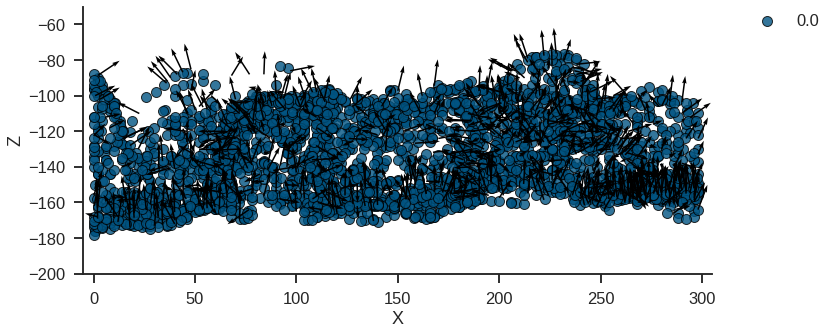

In [27]:
gp.plot.plot_data(geo_model, direction='y')

In [28]:
gp.set_interpolation_data(geo_model, grid=None, compile_theano=True, sparse_version=False)

Compiling theano function...
Compilation Done!


In [29]:
geo_model.interpolator.theano_graph.a_T.get_value()

array(0.67206615, dtype=float32)

In [30]:
val=.02
geo_model.interpolator.theano_graph.a_T.set_value(val)
geo_model.interpolator.theano_graph.a_T_surface.set_value(val)
s = gp.compute_model(geo_model, set_solutions=True, sort_surfaces=False)

In [31]:
geo_model.interpolator.theano_graph.nugget_effect_grad_T.get_value()

array([20., 20., 20., ..., 20., 20., 20.], dtype=float32)

In [32]:
#s = gp.compute_model(geo_model, set_solutions=True, sort_surfaces=False)

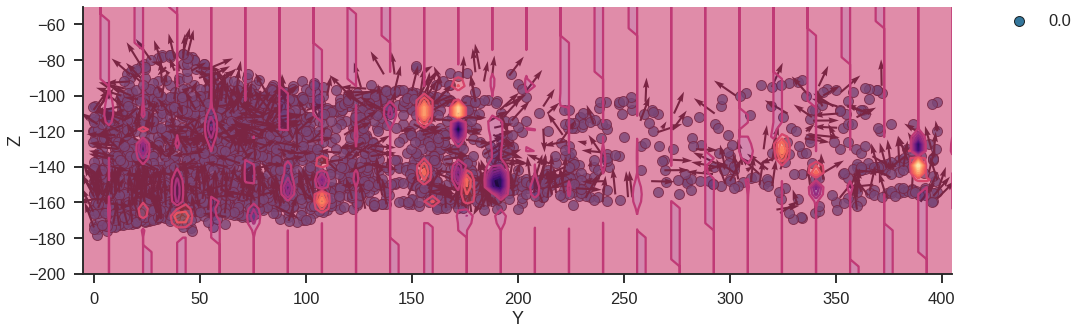

In [33]:
gp.plot.plot_scalar_field(geo_model, 16, series=0, direction='x')

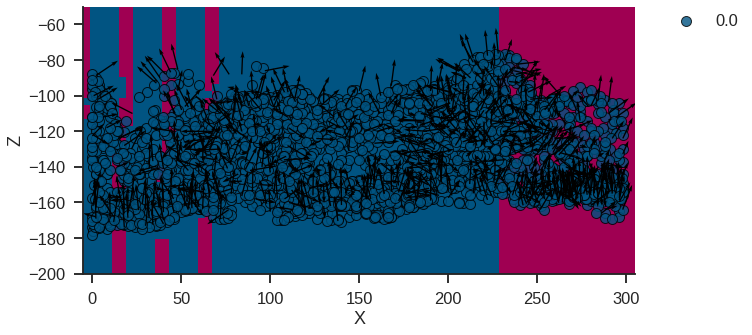

In [34]:
gp.plot.plot_section(geo_model,16, show_data=True, direction='y')

In [15]:
#gp.plot.plot_3D(geo_model, render_data=False)